## Anomaly detection

In [13]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']
print(X.shape)

(307, 2)


Text(0.5, 1.0, 'Data visualisation')

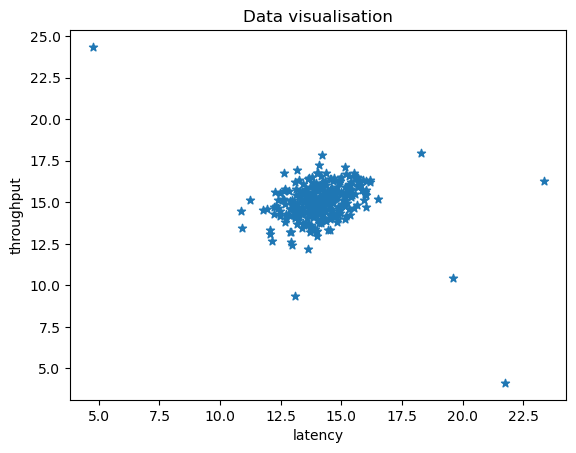

In [14]:
plt.scatter(X.T[0],X.T[1], marker = '*')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.title('Data visualisation')

(array([  1.,   0.,   0.,   8., 142., 142.,  10.,   2.,   0.,   2.]),
 array([ 4.75261282,  6.61133829,  8.47006376, 10.32878923, 12.1875147 ,
        14.04624018, 15.90496565, 17.76369112, 19.62241659, 21.48114206,
        23.33986753]),
 <BarContainer object of 10 artists>)

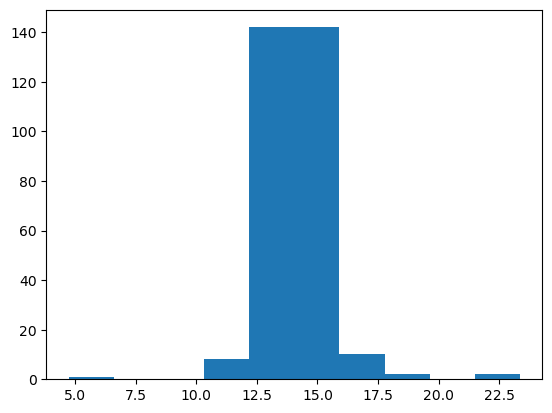

In [15]:
plt.hist(X.T[0])

(array([  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <BarContainer object of 10 artists>)

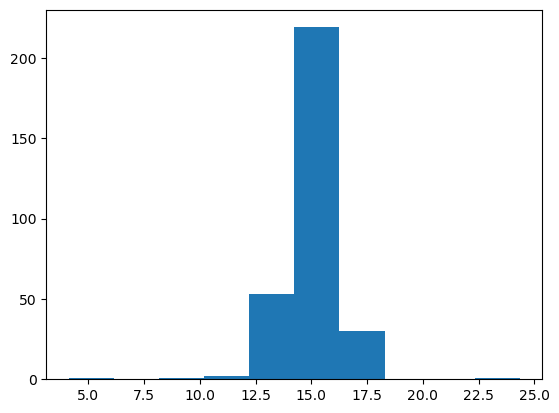

In [16]:
plt.hist(X.T[1])

**Gaussian distribution**

In [17]:
def estimate_gaussian(X):  
 
# TODO: calculate mu and sigma

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
 
    return mu, sigma
 
# TODO: run the function for your dataset
gauss = estimate_gaussian(X)
print(gauss)
x1_mean = gauss[0][0]
x1_std = gauss[1][0]
x2_mean = gauss[0][1]
x2_std = gauss[1][1] 

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


**Calculate probability**

In [18]:
Xval = data['Xval']  
yval = data['yval']

# TODO: check the number of data (X.shape)
print(Xval.shape)
print(yval.shape)

(307, 2)
(307, 1)


In [19]:
from scipy import stats
# TODO: calculate the probability for X data

pdf_norm_X1 = stats.norm.pdf(X[:,0], loc=x1_mean, scale=x1_std)
pdf_norm_X2 = stats.norm.pdf(X[:,1], loc=x2_mean, scale=x2_std)
print(pdf_norm_X1)
print(pdf_norm_X2)

[2.16209766e-01 2.57452082e-01 2.94132233e-01 2.47211916e-01
 2.72515466e-01 2.91811896e-01 1.87139581e-01 1.51176483e-01
 9.35633051e-02 1.66608997e-01 2.93387080e-01 2.94487687e-01
 2.55592373e-01 2.55956210e-01 2.93271402e-01 2.94445597e-01
 2.92880166e-01 2.85183307e-01 2.77277592e-01 9.48976543e-02
 2.70272714e-01 2.93421614e-01 2.41105554e-01 2.93042880e-01
 1.96077288e-01 1.56529793e-01 2.75904586e-01 2.57496215e-01
 2.76670469e-01 2.83495304e-01 1.70682832e-01 2.93186130e-01
 2.04326372e-01 1.95772970e-01 1.08970523e-01 2.45951257e-01
 1.40637462e-01 2.94633744e-01 2.80527513e-01 2.93718568e-01
 2.81681579e-01 2.25242931e-01 2.82189416e-01 2.94296621e-01
 2.66749616e-01 2.88560129e-01 1.11371039e-01 2.94677206e-01
 2.89041960e-01 1.85565845e-01 2.40902893e-01 2.79275320e-01
 2.85710057e-01 2.94679955e-01 2.79865441e-01 2.94563913e-01
 2.94678481e-01 2.92866760e-01 2.61576838e-01 2.93931902e-01
 2.41794994e-01 2.93111756e-01 2.00125732e-01 2.89317885e-01
 2.93040180e-01 2.408274

In [20]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
# TODO: calculate the probability for Xval data
pval[:,0] = stats.norm.pdf(Xval[:,0], loc=x1_mean, scale=x1_std)
pval[:,1] = stats.norm.pdf(Xval[:,1], loc=x2_mean, scale=x2_std)

print(pval.min())
print(pval.max())

6.287111900391367e-26
0.30510142489030334


**Selecting the threshold**

In [21]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
    best_f1 = 0
    best_epsilon = 0
    for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
        t = pval <= tres
        y = np.logical_or(t[:,0],t[:,1])

        f1 = f1_score(yval, y)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = tres

    return best_epsilon, best_f1

In [22]:
best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.0003966715195093453, 0.8750000000000001)

**Anomaly detection result**

In [23]:
mu, sigma = estimate_gaussian(X)

p = np.zeros((X.shape[0], X.shape[1]))

p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))


indexes = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in indexes][0]

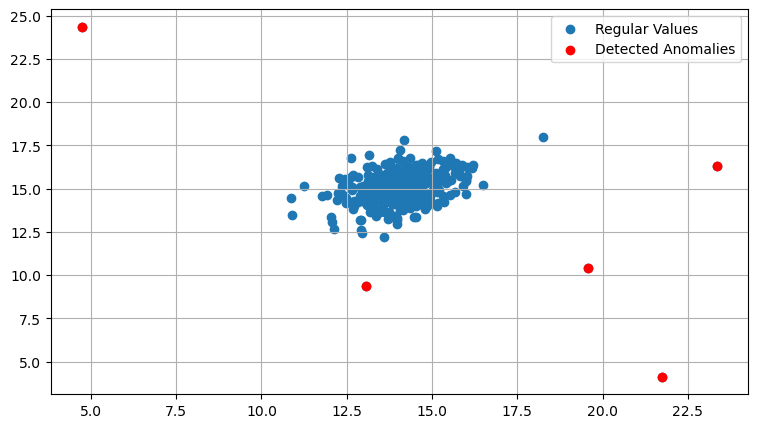

In [24]:
plt.figure(figsize=(9,5))
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color="red")
plt.grid()
plt.legend(["Regular Values", "Detected Anomalies"])
plt.show()